# Análise Exploratória - Pedidos

## Carregando Pacotes

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import matplotlib

## Configurações

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

## Carregando Dados

In [3]:
orders = pd.read_csv('../datasets/raw/olist_order_items_dataset.csv')
orders.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


## Contagem

In [4]:
orders.count()

order_id         112650
order_item_id    112650
product_id       112650
seller_id        112650
price            112650
freight_value    112650
dtype: int64

## Top 10 Produtos

In [5]:
orders[u'product_id'].value_counts()[:10]

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64

## Valor Médio dos Pedidos

In [6]:
print('Price: R$ %.2f' % (orders[u'price'].mean()))

Price: R$ 120.65


## Valor Médio dos Fretes

In [7]:
print('Price: R$ %.2f' % (orders[u'freight_value'].mean()))

Price: R$ 19.99


- O valor médio dos produtos vendidos por estado se desvia muito?
- E o valor do frete?

## Cliente por pedido

In [8]:
order_infos = pd.read_csv('../datasets/raw/olist_orders_dataset.csv')
order_infos = order_infos[["order_id", "customer_id"]]
order_infos.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


## Estados por cliente

In [9]:
customers = pd.read_csv('../datasets/raw/olist_customers_dataset.csv')
customers = customers[["customer_id", "customer_state"]]
customers = customers.set_index("customer_id")
customers.head()

,customer_state
customer_id,
06b8999e2fba1a1fbc88172c00ba8bc7,SP
18955e83d337fd6b2def6b18a428ac77,SP
4e7b3e00288586ebd08712fdd0374a03,SP
b2b6027bc5c5109e529d4dc6358b12c3,SP
4f2d8ab171c80ec8364f7c12e35b23ad,SP


## Valores dos pedidos por estado

In [15]:
filtered_orders = orders[["order_id", "price", "freight_value"]]
filtered_orders = pd.merge(filtered_orders, order_infos, on="order_id")

orders_by_state = pd.merge(filtered_orders, customers, on="customer_id")
orders_by_state.head()

,order_id,price,freight_value,customer_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,3ce436f183e68e07877b285a838db11a,RJ
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,SP
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,MG
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,SP


## Desvio padrão dos preços e fretes por estado

In [19]:
means_by_state = orders_by_state.groupby("customer_state").mean()
mean_prices_by_state = means_by_state["price"]
mean_freight_by_state = means_by_state["freight_value"]

print(mean_prices_by_state.std() / mean_prices_by_state.mean() * 100, '%', sep='')
print(mean_freight_by_state.std() / mean_freight_by_state.mean() * 100, '%', sep='')

14.564072869045882%
27.436040784463955%


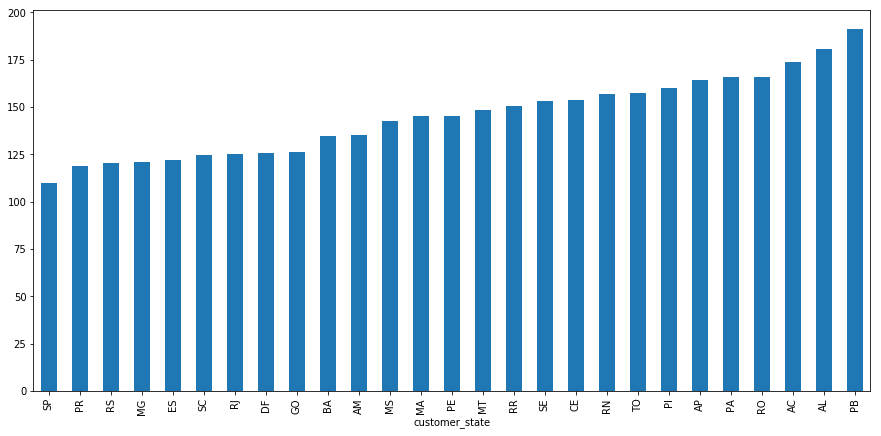

In [20]:
means_by_state.sort_values("price")["price"].plot.bar()

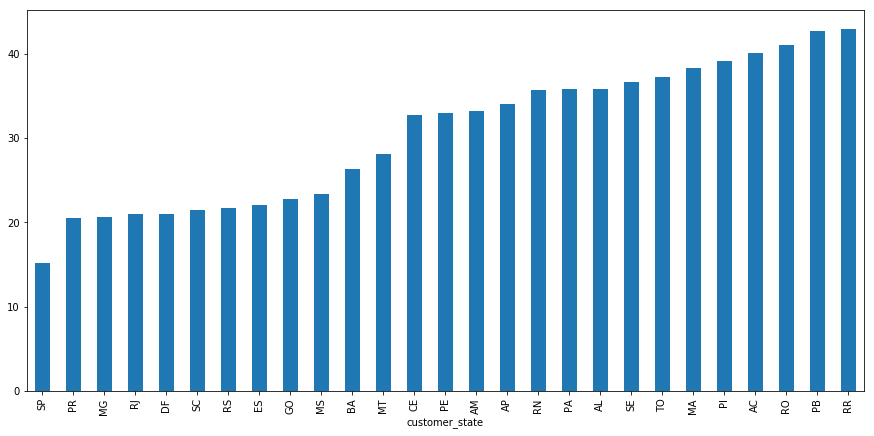

In [21]:
means_by_state.sort_values("freight_value")["freight_value"].plot.bar()

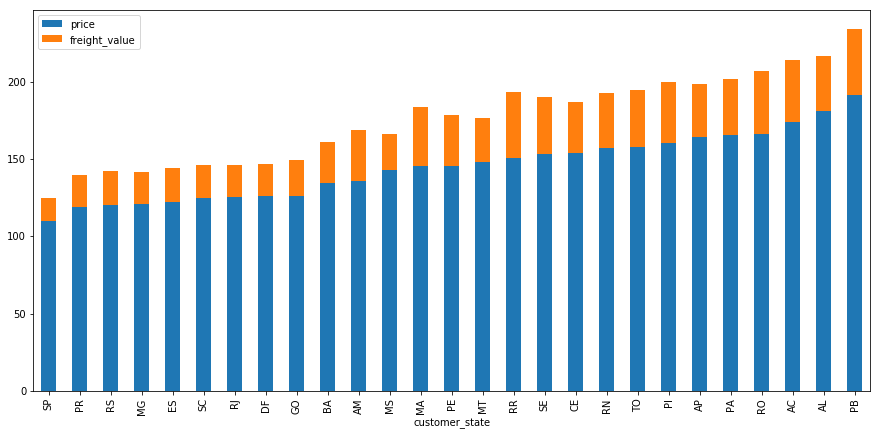

In [22]:
orders_by_state.groupby("customer_state").mean().sort_values(["price", "freight_value"]).plot.bar(stacked=True)